## Zero to ~~hero~~ starter with Python and data science

This is a far too brief crash course to get started with Python. We use jupyter notebooks as interface to this programming language. Our focus is on reading and analysing environmental data. The examples will be related to hydropedological topics. To get there quickly, we will largely ignore most of the details about data types, storage allocation behaviour, different modules etc.

Let's go.

(cc) conrad.jackisch@tbt.tu-freiberg.de, Dec 09, 2021

### The Notebooks and how to use them
Please double click this text. You will enter the edit-mode. The cell type is set to *Markdown* to interpret this code as nice text. You can also enter some equations like this one:
$$\theta = \frac{V_{water}}{V_{total}}$$

The default cell type is *Code* which allows you to enter a couple of python commands. To execute the code, just hit `Shift+Enter` somewhere in the cell.

In [32]:
# in a code cell, a line starting with hash is ignored
# it is always good to write comments about what happens here

# here we load a couple of modules which are frequently needed
%pylab inline        
# PyLab is a collection of numerical and plotting libraries including NumPy and Matplotlib
import pandas as pd   #Pandas makes data exploration a breeze
import seaborn as sns #Seaborn makes nice plots
sns.set(style='whitegrid', palette='deep') #this are some settings for seaborn

Populating the interactive namespace from numpy and matplotlib


### Some random data and respective analyses
Let's generate a couple of random data values and explore what we have got.

 * `pd` refers to functions from the *Pandas* module.
 * `np` refers to functions from the *NumPy* module.
 * Round brackets contain arguments for a function `function(argument)` or can be a tuple `(number,number)`.
 * Corner brackets contain indexes `array[index]` or can be lists `[element,element]`.

In [14]:
# 2 columns of 20 random values each through the function np.random.random()
# converted to a pandas DataFrame through the respective function pd.DataFrame()
# stored in the object data using '='

data = pd.DataFrame(np.random.random((20,2)))

# you can print the data frame:
data

,0,1
0,0.617235,0.737670
1,0.383482,0.613037
2,0.143101,0.744554
3,0.966133,0.386775
4,0.972431,0.260685
5,0.134084,0.081528
6,0.709197,0.648434
7,0.737722,0.865643
8,0.498273,0.091231
9,0.581464,0.090446


In [15]:
# you can transpose the data frame (but here it is not stored)
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.617235,0.383482,0.143101,0.966133,0.972431,0.134084,0.709197,0.737722,0.498273,0.581464,0.009070,0.931080,0.063537,0.881981,0.250088,0.776754,0.064065,0.000667,0.359599,0.326116
1,0.737670,0.613037,0.744554,0.386775,0.260685,0.081528,0.648434,0.865643,0.091231,0.090446,0.817815,0.156741,0.079888,0.686338,0.261382,0.744193,0.185239,0.425051,0.424006,0.722511


In [21]:
# you can give the data frame a new index and column names
# we like to make it a time series of 'birds' and 'monkeys' starting 2020-07-01 12:00 stepping hourly
data.index = pd.to_datetime(np.arange(len(data)), unit='h', origin=pd.Timestamp('2020-07-01 12:00:00'))
data.columns = ['birds', 'monkeys']
data

,birds,monkeys
2020-07-01 12:00:00,0.617235,0.737670
2020-07-01 13:00:00,0.383482,0.613037
2020-07-01 14:00:00,0.143101,0.744554
2020-07-01 15:00:00,0.966133,0.386775
2020-07-01 16:00:00,0.972431,0.260685
2020-07-01 17:00:00,0.134084,0.081528
2020-07-01 18:00:00,0.709197,0.648434
2020-07-01 19:00:00,0.737722,0.865643
2020-07-01 20:00:00,0.498273,0.091231
2020-07-01 21:00:00,0.581464,0.090446


### Now some plots

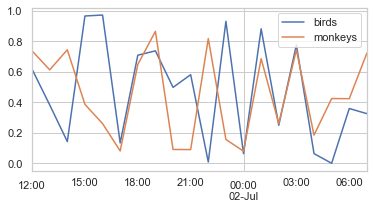

In [51]:
figsize(6,3)
data.plot()

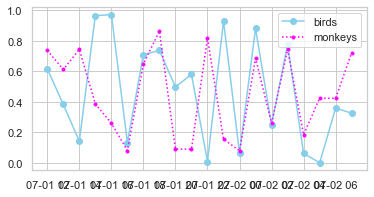

In [56]:
plot(data.birds,'o-',c='skyblue',label='birds')
plot(data.monkeys,'.:',c='magenta',label='monkeys')
legend()

Play with the plots above and change the appearance.

 * Colours: https://matplotlib.org/stable/gallery/color/named_colors.html
 * Linestyles: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
 * Figsize: Definition of ratio and size of the figure

### More plots

(-0.1, 1.1)

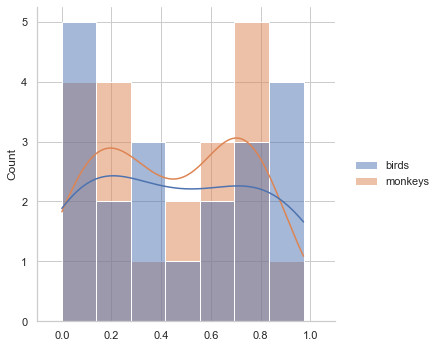

In [68]:
sns.displot(data, kde=True)
xlim(-0.1,1.1)

Text(0, 0.5, 'monkeys')

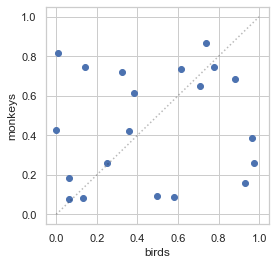

In [73]:
figsize(4,4)
plot(data.birds, data.monkeys, 'o')
plot([0,1],[0,1],':',c='k',alpha=0.3)
xlabel('birds')
ylabel('monkeys')

In order to save a plot, you can use the following command inside the respective cell:
`savefig('file.pdf',bbox_inches='tight')`

## Read data and plot it
In most cases, we will need to read data. That is quite easy when the data is somewhat structured. Excel, csv or hdf5 files are quickly handled with: `pd.read_excel('file.xlsx', sheet_name='Sheet')`, `pd.read_csv('file.csv')`, `pd.read_hdf('file.hdf')`

In [75]:
# this reads the sheet "Evaluation-Retention Θ(pF)" from the Excel file "ret265WB.xlsx" but does not assign it to any object
pd.read_excel('ret265WB.xlsx',sheet_name='Evaluation-Retention Θ(pF)')

,pF [-],Water Content [Vol%],Weight [-]
0,0.839,51.97,NaN
1,0.840,51.97,NaN
2,0.841,51.95,NaN
3,0.841,51.93,NaN
4,0.846,51.91,NaN
...,...,...,...
98,2.908,21.60,NaN
99,4.050,12.23,3.0
100,4.820,8.48,2.0
101,5.420,5.06,6.0


We have three files with data from soil water retention measurements. 

Let's first make life easy and check all file names in our folder using the library *glob*. `glob.glob(search.*)`

Then prepare the data to be plotted in one figure.

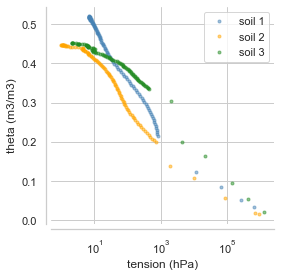

In [76]:
# Read soil water retention data

# get list of excel files holding the results of the retention measurements:
import glob
fis = glob.glob('./ret*.xlsx')

# read the files in the list fis by using the respective index 0, 1 and 2:
ret = pd.read_excel(fis[0],sheet_name='Evaluation-Retention Θ(pF)')
ret.columns = ['pF','theta','w']
ret.theta *= 0.01
ret['smpl']=fis[0][3:-5]

ret1 = pd.read_excel(fis[1],sheet_name='Evaluation-Retention Θ(pF)')
ret1.columns = ['pF','theta','w']
ret1.theta *= 0.01
ret1['smpl']=fis[1][3:-5]

ret2 = pd.read_excel(fis[2],sheet_name='Evaluation-Retention Θ(pF)')
ret2.columns = ['pF','theta','w']
ret2.theta *= 0.01
ret2['smpl']=fis[2][3:-5]

# plot the data
plot(10**ret.pF,ret.theta,'.',c='steelblue',alpha=0.5,label='soil 1')
plot(10**ret1.pF,ret1.theta,'.',c='orange',alpha=0.5,label='soil 2')
plot(10**ret2.pF,ret2.theta,'.',c='forestgreen',alpha=0.5,label='soil 3')

legend()
xlabel('tension (hPa)')
ylabel('theta (m3/m3)')
xscale('log')
#yscale('log')
sns.despine(offset=5)

As last step in this preparation, we will demonstrate how functions can ease the coding. You have seen a lot of redundancy in the cell above. Let's rewite the same step using a read function:

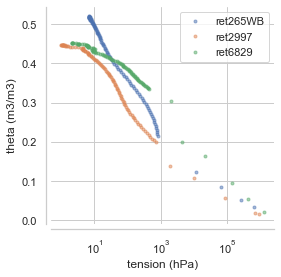

In [82]:
def read_plot(fi, sn='Evaluation-Retention Θ(pF)'):
    ret = pd.read_excel(fi,sheet_name=sn)
    ret.columns = ['pF','theta','w']
    ret.theta *= 0.01
    ret['smpl'] = fi.split('.')[1][1:]
    plot(10**ret.pF,ret.theta,'.',alpha=0.5,label=fi.split('.')[1][1:])
    return ret

fis = glob.glob('./ret*.xlsx')
ret = read_plot(fis[0])
ret1 = read_plot(fis[1])
ret2 = read_plot(fis[2])

legend()
xlabel('tension (hPa)')
ylabel('theta (m3/m3)')
xscale('log')
#yscale('log')
sns.despine(offset=5)

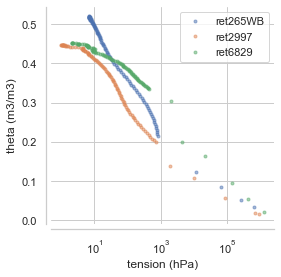

In [85]:
# and even more general:
firstrun = True
for fi in fis:
    if firstrun:
        ret = read_plot(fi)
        firstrun = False
    else:
        ret = pd.concat([ret,read_plot(fi)])

legend()
xlabel('tension (hPa)')
ylabel('theta (m3/m3)')
xscale('log')
#yscale('log')
sns.despine(offset=5)

Please play a little with the given examples. Check how to save the figures etc.

## Time Series
Let's check how to use time series. To do so, we will import some weather data from the DWD station in Dresden Klotzsche.

In [87]:
meteo = pd.read_csv('Klotzsche1h.csv',index_col=0)
meteo.index = pd.to_datetime(meteo.index)
meteo.head()


,T,Tmin,Tmax,Prec,Rad,RHmin,RHmax,u2,aP
1997-01-01 00:00:00,-15.5,-15.5,-15.5,0.0,0.0,89.0,89.0,2.3,1026.3
1997-01-01 01:00:00,-16.1,-16.1,-16.1,0.0,0.0,89.0,89.0,2.8,1026.2
1997-01-01 02:00:00,-15.6,-15.6,-15.6,0.0,0.0,89.0,89.0,2.3,1026.2
1997-01-01 03:00:00,-16.0,-16.0,-16.0,0.0,0.0,87.0,87.0,2.3,1025.2
1997-01-01 04:00:00,-16.4,-16.4,-16.4,0.0,0.0,88.0,88.0,1.6,1025.6


Text(0, 0.5, 'Radiation (W/m²)')

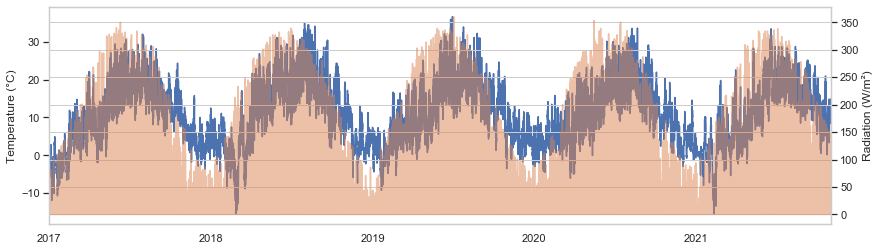

In [94]:
figsize(14,4)
tst = pd.to_datetime('2017-01-01 00:00:00')
tnd = pd.to_datetime('2021-11-01 00:00:00')

meteo.loc[tst:tnd,'T'].plot()
ylabel('Temperature (°C)')
meteo.loc[tst:tnd,'Rad'].plot(secondary_y=True,alpha=0.5)
ylabel('Radiation (W/m²)')

Text(0, 0.5, 'Radiation (W/m²)')

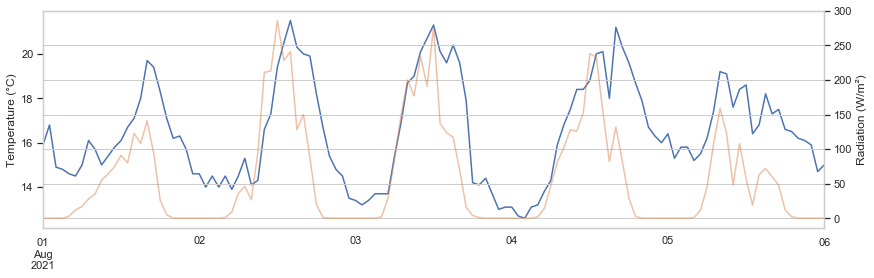

In [93]:
figsize(14,4)
tst = pd.to_datetime('2021-08-01 00:00:00')
tnd = pd.to_datetime('2021-08-06 00:00:00')

meteo.loc[tst:tnd,'T'].plot()
ylabel('Temperature (°C)')
meteo.loc[tst:tnd,'Rad'].plot(secondary_y=True,alpha=0.5)
ylabel('Radiation (W/m²)')

So far, this was hourly data. The nice things start, when we aggregate time series...

Each variable has a different aggregation function. Like air temperature will likely be mean (or max/min) while precipitation will require sum.

In [95]:
meteo_daily = meteo.resample('1D').agg({'T':'mean','Tmin':'min','Tmax':'max','Prec':'sum','Rad':'sum','RHmin':'min','RHmax':'max','u2':'mean','aP':'mean'})

Text(0, 0.5, 'Radiation (W/m²)')

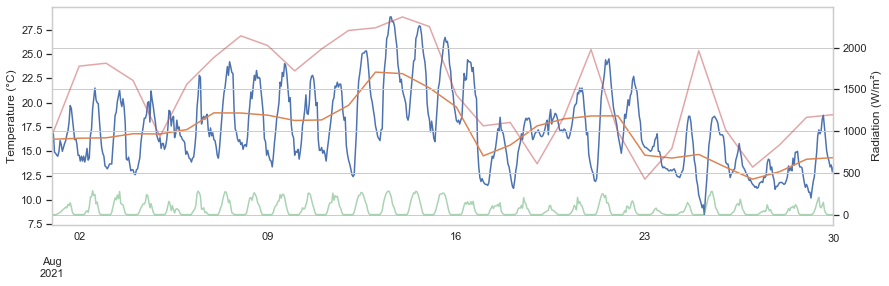

In [97]:
figsize(14,4)
tst = pd.to_datetime('2021-08-01 00:00:00')
tnd = pd.to_datetime('2021-08-30 00:00:00')

meteo.loc[tst:tnd,'T'].plot()
meteo_daily.loc[tst:tnd,'T'].plot()
ylabel('Temperature (°C)')
meteo.loc[tst:tnd,'Rad'].plot(secondary_y=True,alpha=0.5)
meteo_daily.loc[tst:tnd,'Rad'].plot(secondary_y=True,alpha=0.5)
ylabel('Radiation (W/m²)')